In [1]:
# 분석에 필요한 패키지 로드
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\헬스케어데이터.csv')
df.drop(['기준년도', '진료내역일련번호', '데이터 기준일자'], axis = 1, inplace = True)
df['서식코드'] = df['서식코드'].apply(lambda x: 1 if x == 2 else 0) 
df['주상병코드'] = df['주상병코드'].apply(lambda x: x[:1])
df['부상병코드'] = df['부상병코드'].apply(lambda x: x[:1])
# 해당 열들은 모두 범주형데이터임(나이브 베이지안으로 따로 분류모델작성)
# df.drop(['주상병코드', '부상병코드', '진료과목코드', '시도코드'], axis = 1, inplace = True)
df.head()

,가입자 일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,1,2,12,46,20191104,0,5,M,M,1,1,0.25,19240,9600,9640,0
1,1,2,12,46,20190806,0,1,E,N,1,1,0.25,145680,72800,72880,0
2,1,2,12,46,20190920,0,1,N,E,1,1,0.25,13240,6600,6640,3
3,1,2,12,46,20190807,1,1,E,N,7,21,0.25,861590,205810,655780,0
4,1,2,12,46,20190318,0,13,H,J,1,1,0.15,48440,14500,33940,3


In [11]:
len(df[df['서식코드'] == 1]), len(df[df['서식코드'] == 0]), len(df), len(df[df['서식코드'] == 0]) / len(df[df['서식코드'] == 1])

(283962, 12894383, 13178345, 45.408832872004)

In [16]:
# 오버샘플링 적용(1)
from tqdm.notebook import tqdm
df_train1 = df.copy()
n = 45
df_ovsm = df[df['서식코드'] == 1].copy()
df_ovsm.reset_index(inplace = True)
df_ovsm.drop(['index'], axis = 1, inplace = True)
for i in tqdm(range(45)):
    df_train1 = pd.concat([df_train1, df_ovsm])

  0%|          | 0/45 [00:00<?, ?it/s]

In [33]:
# 오버샘플링 적용(2)
print(len(df_train1[df_train1['서식코드'] == 1]), len(df_train1[df_train1['서식코드'] == 0]))

13062252 12894383


In [31]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

df_train1[['진료과목코드', '서식코드']]
dummy_columns = ["진료과목코드"]
df_train1_dummy = dummy_data(df_train1[['진료과목코드', '서식코드']], dummy_columns)

In [21]:
# 원-핫 인코딩이 되었는지 확인
print(f'인코딩 전 데이터구조 : {df_train1[["진료과목코드", "서식코드"]].shape} / 인코딩 후 데이터구조 : {df_train1_dummy.shape}')

인코딩 전 데이터구조 : (25956635, 2) / 인코딩 후 데이터구조 : (25956635, 34)


<AxesSubplot:title={'center':'특성별 피어슨 상관계수'}>

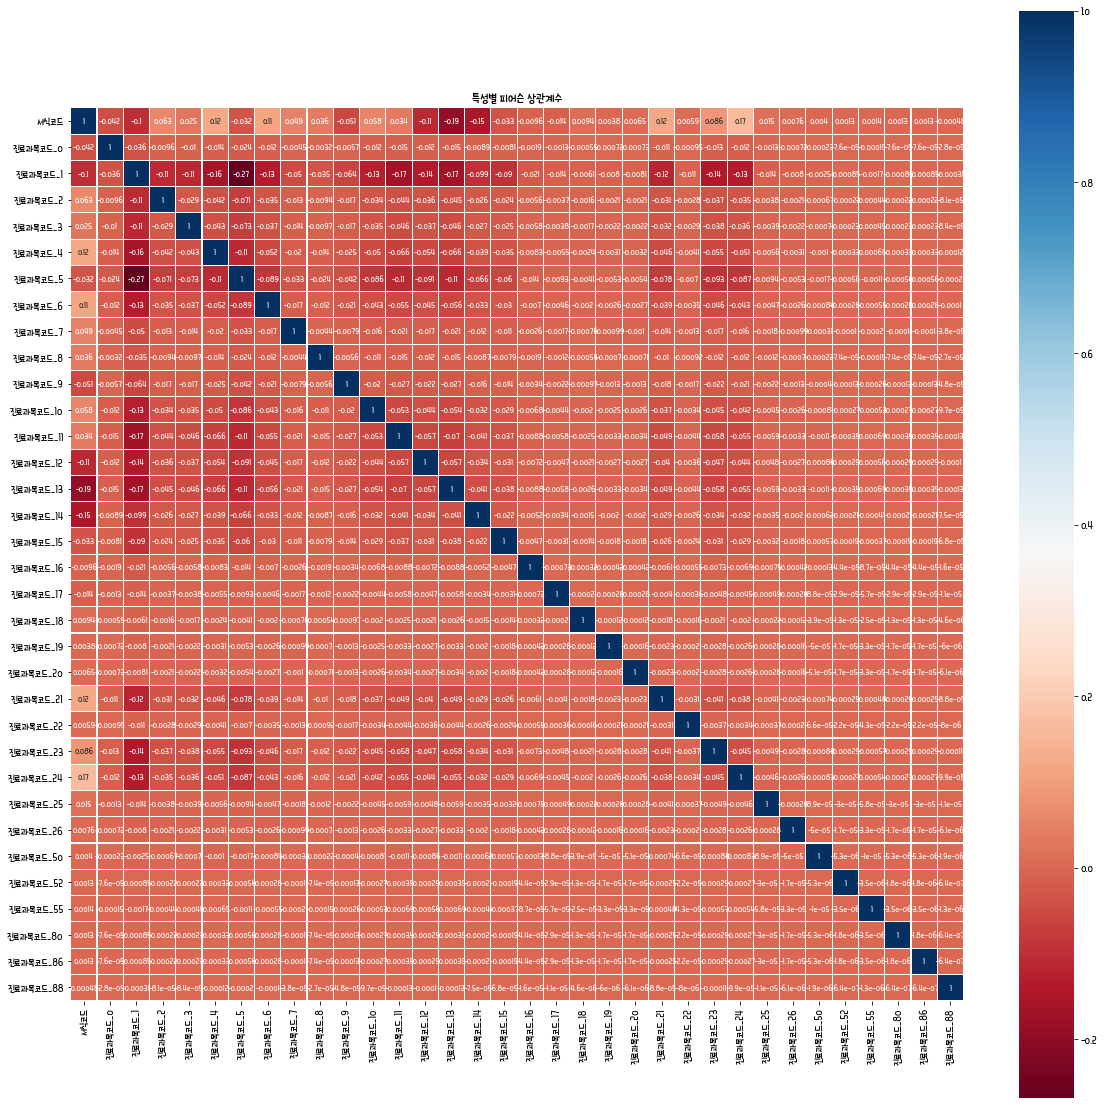

In [32]:
colormap = plt.cm.RdBu
plt.figure(figsize = (20, 20))
plt.title('특성별 피어슨 상관계수')
sns.heatmap(df_train1_dummy.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {'size' : 8})

<AxesSubplot:title={'center':'특성별 피어슨 상관계수'}>

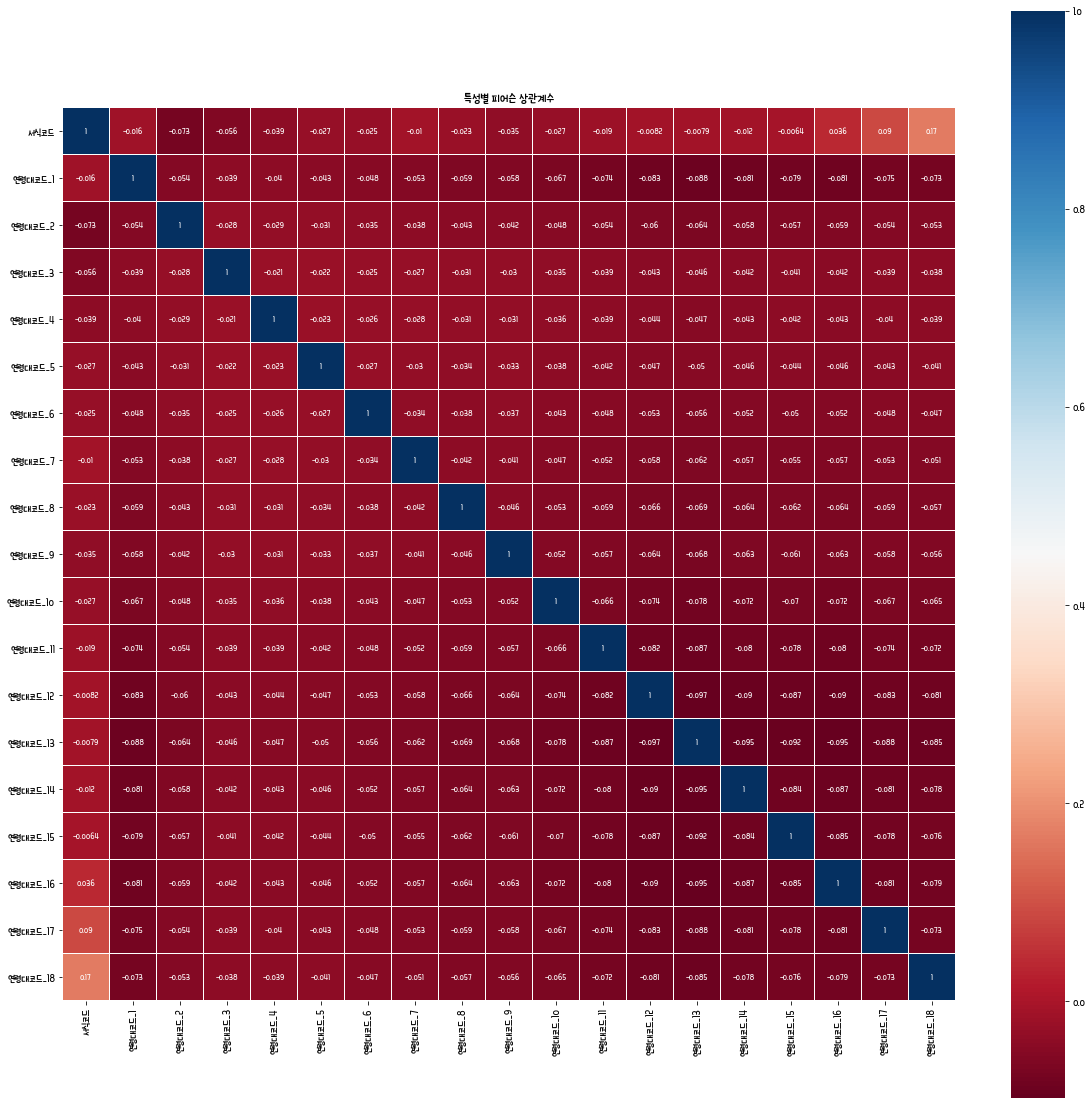

In [29]:
df_train1[['연령대코드', '서식코드']]
dummy_columns = ["연령대코드"]
df_train1_dummy1 = dummy_data(df_train1[['연령대코드', '서식코드']], dummy_columns)

olormap = plt.cm.RdBu
plt.figure(figsize = (20, 20))
plt.title('특성별 피어슨 상관계수')
sns.heatmap(df_train1_dummy1.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white',  annot = True, annot_kws = {'size' : 8})

In [ ]:
df_train1[['주상병코드', '서식코드']]
dummy_columns = ["주상병코드"]
df_train1_dummy2 = dummy_data(df_train1[['주상병코드', '서식코드']], dummy_columns)

olormap = plt.cm.RdBu
plt.figure(figsize = (20, 20))
plt.title('특성별 피어슨 상관계수')
sns.heatmap(df_train1_dummy2.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white',  annot = True, annot_kws = {'size' : 4})